# Project Supervised Learning

# Importing required libraries

In [170]:
##importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


# Context:
This case is about a bank (Thera Bank) whose management wants to explore
ways of converting its liability customers to personal loan customers (while
retaining them as depositors). A campaign that the bank ran last year for liability
customers showed a healthy conversion rate of over 9% success. This has
encouraged the retail marketing department to devise campaigns with better
target marketing to increase the success ratio with minimal budget.

# Attribute Information:
1. ID : Customer ID
2. Age : Customer's age in completed years
3. Experience : #years of professional experience
4. Income : Annual income of the customer in thousands 
5. ZIP Code : Home Address ZIP code
6. Family : Family size of the customer
7. CCAvg : Avg. spending on credit cards per month in thousands
8. Education : Education Level
                1. Undergrad
                2. Graduate
                3. Advanced/Professional
9. Mortgage : Value of house mortgage if any. ($000)
10. Personal Loan : Did this customer accept the personal loan offered in the last campaign?
11. Securities Account : Does the customer have a securities account with the bank?
12. CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
13. Online : Does the customer use internet banking facilities?
14. Credit card : Does the customer use a credit card issued by UniversalBank?

Here the Personal loan is our target variable.

# Reading the dataset and displaying the first 10 records of the dataset.

In [171]:
campaign_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv') ##reading the dataframe
campaign_data.head(10) ##showing the first 10 records from the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# Checking the Shape and Type of the Data

In [172]:
rows=len(campaign_data)
columns = len(campaign_data.columns)
print('The dataset contains %d rows and %d columns.' %(rows,columns))
campaign_data.info() #Displays the type of the columns that exist in the dataset

The dataset contains 5000 rows and 14 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Most of the input variables are categorical in nature namely- Family, Education, Securities Account, CD Account, Online, Credit Card. Education is ordinal i.e. it can be ordered. These categorical variables are stored as int. Hence, there is a need to convert them to category.
Some of the input variables are nominal in nature.
- ID
- ZIP Code
These nominal variables can be dropped.

The following variables are continuous.
- Age
- Experience
- Income
- CCAvg (Average Credit Card Spending)

I presume that there will be a high correlation between age and experience.
So, let's check that and take a decision whether to drop any one of those two variables.

In [173]:
#dropping ZIP code and ID
campaign_data.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [174]:
campaign_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [175]:
#Converting the data type of categorical columns

campaign_data['Family'] = campaign_data['Family'].astype('int').astype("category")
campaign_data['Education'] = campaign_data['Education'].astype('int').astype("category")

campaign_data['Personal Loan'] = campaign_data['Personal Loan'].astype('int').astype("category")
campaign_data['Securities Account'] = campaign_data['Securities Account'].astype('int').astype("category")
campaign_data['CD Account'] = campaign_data['CD Account'].astype('int').astype("category")
campaign_data['Online'] = campaign_data['Online'].astype('int').astype("category")
campaign_data['CreditCard'] = campaign_data['CreditCard'].astype('int').astype("category")

In [176]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   category
 9   CD Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.4 KB


# Five Number Summary for the Numerical variables

In [177]:
campaign_data.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


- There are no outliers for age and experience. 
- However, the minimum value of experience is -3 which is peculiar.
- Expectedly, there are few outliers for income, CCAvg and Mortgage amount.
## Let's visualize these outliers and treat these outliers as Logistic & Gaussian Naive Bayes Classifications techniques are sensitive to outliers
I'm replacing outliers (any value beyond 75th percentile + 1.5*IQR) with the medians

IQR = 59
Median = 64
Upper Limit 186
No. of outliers based on Income = 96


count    5000.000000
mean       71.265400
std        42.816838
min         8.000000
25%        39.000000
50%        64.000000
75%        93.000000
max       185.000000
Name: Income, dtype: float64

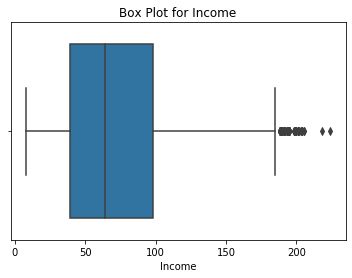

In [178]:
sns.boxplot(campaign_data['Income']).set_title('Box Plot for Income')
q1=np.percentile(campaign_data['Income'], 25)
q3=np.percentile(campaign_data['Income'], 75)
med=np.percentile(campaign_data['Income'], 50)
IQR= q3-q1
upper_limit=q3+1.5*IQR
print('IQR = %d'%IQR)
print('Median = %d'%med)
print('Upper Limit %d'%upper_limit)
outliers=campaign_data[campaign_data['Income'] > upper_limit]
outlier_cnt=len(outliers)
print('No. of outliers based on Income = %d'%outlier_cnt)

#Replacing the outlier values with median
campaign_data['Income'] = np.where(campaign_data['Income'] > upper_limit, med, campaign_data['Income'])
campaign_data['Income'].describe()

IQR = 1
Upper Limit 5
No. of outliers based on CCAvg = 324


count    5000.000000
mean        1.591578
std         1.150242
min         0.000000
25%         0.700000
50%         1.500000
75%         2.200000
max         5.200000
Name: CCAvg, dtype: float64

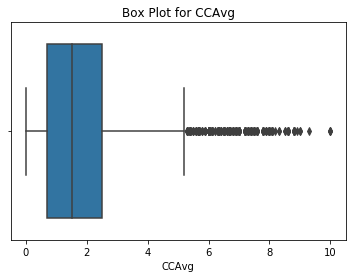

In [179]:
sns.boxplot(campaign_data['CCAvg']).set_title('Box Plot for CCAvg')
q1=np.percentile(campaign_data['CCAvg'], 25)
q3=np.percentile(campaign_data['CCAvg'], 75)
med=np.percentile(campaign_data['CCAvg'], 50)
IQR= q3-q1
upper_limit=q3+1.5*IQR
print('IQR = %d'%IQR)
print('Upper Limit %d'%upper_limit)
outliers=campaign_data[campaign_data['CCAvg'] > upper_limit]
outlier_cnt=len(outliers)
print('No. of outliers based on CCAvg = %d'%outlier_cnt)


#Replacing the outlier values with median
campaign_data['CCAvg'] = np.where(campaign_data['CCAvg'] > upper_limit, med, campaign_data['CCAvg'])
campaign_data['CCAvg'].describe()

IQR = 101
Upper Limit 252
No. of outliers based on Mortgage = 291
No. of outliers based on Mortgage after treatment = 0


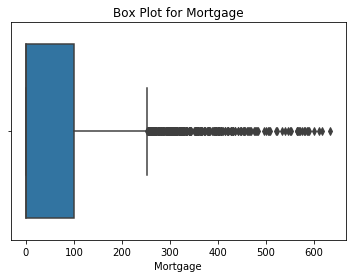

In [180]:
sns.boxplot(campaign_data['Mortgage']).set_title('Box Plot for Mortgage')
q1=np.percentile(campaign_data['Mortgage'], 25)
q3=np.percentile(campaign_data['Mortgage'], 75)
med=np.percentile(campaign_data['Mortgage'], 50)
IQR= q3-q1
upper_limit=q3+1.5*IQR
print('IQR = %d'%IQR)
print('Upper Limit %d'%upper_limit)
outliers=campaign_data[campaign_data['Mortgage'] > upper_limit]
outlier_cnt=len(outliers)
print('No. of outliers based on Mortgage = %d'%outlier_cnt)

#Replacing the outlier values with median
campaign_data['Mortgage'] = np.where(campaign_data['Mortgage'] > upper_limit, med, campaign_data['Mortgage'])
campaign_data['Mortgage'].describe()
outliers=campaign_data[campaign_data['Mortgage'] > upper_limit]
outlier_cnt=len(outliers)
print('No. of outliers based on Mortgage after treatment = %d'%outlier_cnt)

In [181]:
campaign_data.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,71.265400,1.591578,35.799200
std,11.463166,11.467954,42.816838,1.150242,66.685278
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,93.000000,2.200000,0.000000
max,67.000000,43.000000,185.000000,5.200000,252.000000


Outlier Treatment is complete.
Let's look at the correlation between age and experience

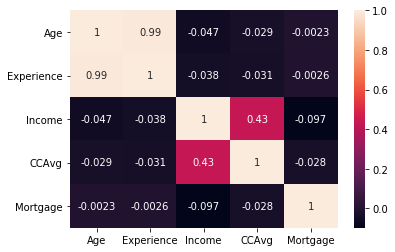

In [182]:

corrMatrix = campaign_data.corr()
sns.heatmap(corrMatrix, annot=True);

Age and Experience are hihgly correlated. Hence, dropping experience to avoid multi-collinearity.
There is a slight correlation between Credit Card Spend and Income.
Surprisingly, it is not strong enough.

In [183]:
campaign_data.drop(['Experience'],axis=1,inplace=True)

In [184]:
campaign_data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49.0,4,1.6,1,0.0,0,1,0,0,0
1,45,34.0,3,1.5,1,0.0,0,1,0,0,0
2,39,11.0,1,1.0,1,0.0,0,0,0,0,0
3,35,100.0,1,2.7,2,0.0,0,0,0,0,0
4,35,45.0,4,1.0,2,0.0,0,0,0,0,1


# Distribution of Age, Income, CCAvg and Mortgage
- The Distribution of age is uniformly spread from 30-60
- Income is expectedly right skewed
- Tough to understand CCAvg
- Roughly 80% of the people have 0 mortgage. This could be due to the fact that they stay in rented houses or haven't mortgaged their house


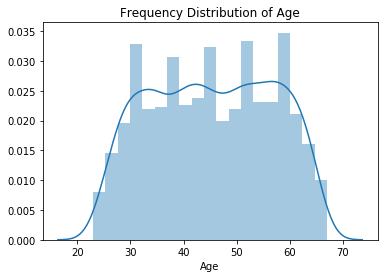

In [185]:
sns.distplot(campaign_data['Age']).set_title('Frequency Distribution of Age');

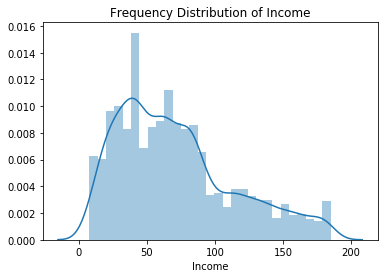

In [186]:
sns.distplot(campaign_data['Income']).set_title('Frequency Distribution of Income');

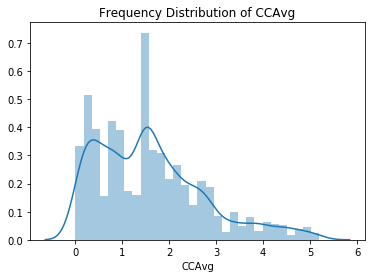

In [187]:
sns.distplot(campaign_data['CCAvg']).set_title('Frequency Distribution of CCAvg');

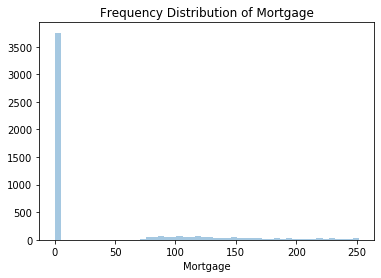

In [188]:
sns.distplot(campaign_data['Mortgage'],kde=False).set_title('Frequency Distribution of Mortgage');

# Checking the Distribution of Categorical Variables with respect to the Target Variables
- This will help us understand if there is any relationship between the variable and customer taking the personal loan

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


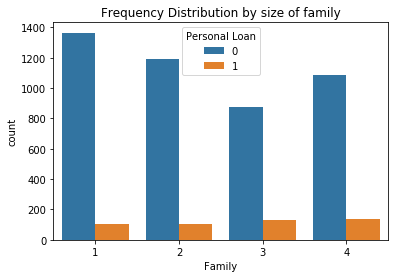

In [189]:
sns.countplot(campaign_data['Family'],hue=campaign_data['Personal Loan']).set_title('Frequency Distribution by size of family')
pd.crosstab(campaign_data['Family'],campaign_data['Personal Loan'])
prop_Y = campaign_data['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

- It seems that the family with greater size are more inclined to taking a personal loan.
- ~55% personal loan taker come from 44 of the population. 
- This 44% of population have greater than 2 family size. 
- The target is imbalanced in nature as there are only 9.6% of the positive events

Personal Loan,0,1
Education,,
1,2003,93
2,1221,182
3,1296,205


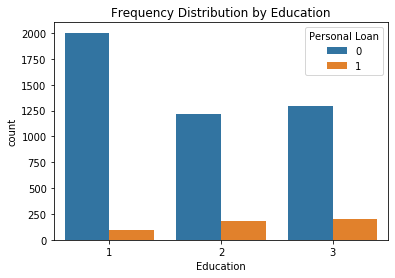

In [190]:
sns.countplot(campaign_data['Education'],hue=campaign_data['Personal Loan']).set_title('Frequency Distribution by Education')
pd.crosstab(campaign_data['Education'],campaign_data['Personal Loan'])

Undergraduates did not respond well to the campaign last time. Their response rate was 4.4% campared to overall 9.6%.

Personal Loan,0,1
Securities Account,,
0,4058,420
1,462,60


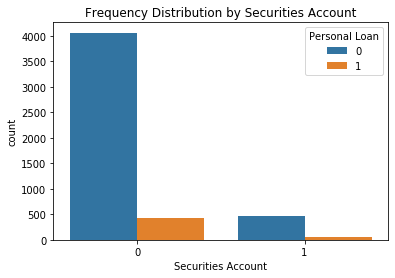

In [191]:
sns.countplot(campaign_data['Securities Account'],hue=campaign_data['Personal Loan']).set_title('Frequency Distribution by Securities Account')
pd.crosstab(campaign_data['Securities Account'],campaign_data['Personal Loan'])


- Majority of the population (90%) does not have security account.
- Those who have security account have slightly better response rate than those who don't.

Personal Loan,0,1
CD Account,,
0,4358,340
1,162,140


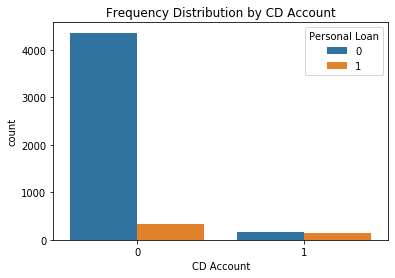

In [192]:
sns.countplot(campaign_data['CD Account'],hue=campaign_data['Personal Loan']).set_title('Frequency Distribution by CD Account')
pd.crosstab(campaign_data['CD Account'],campaign_data['Personal Loan'])


People with CD Accounts had very good response rate. However, the number of accounts with CD Account was close to 6% only.

Personal Loan,0,1
Online,,
0,1827,189
1,2693,291


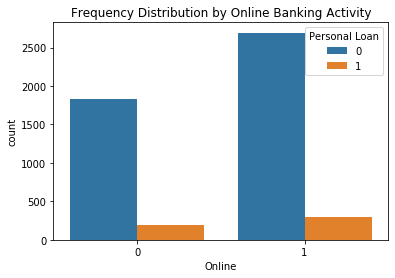

In [193]:
sns.countplot(campaign_data['Online'],hue=campaign_data['Personal Loan']).set_title('Frequency Distribution by Online Banking Activity')
pd.crosstab(campaign_data['Online'],campaign_data['Personal Loan'])


Nearly 3/5th of the customers had internet banking facilities. However, the response rate was similar acros the groups with or without internet banking facilities.

Personal Loan,0,1
CreditCard,,
0,3193,337
1,1327,143


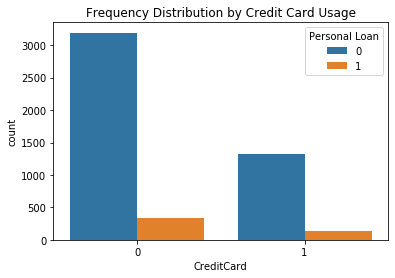

In [194]:
sns.countplot(campaign_data['CreditCard'],hue=campaign_data['Personal Loan']).set_title('Frequency Distribution by Credit Card Usage')
pd.crosstab(campaign_data['CreditCard'],campaign_data['Personal Loan'])

It seems that using credit card issued by Universal Bank does not influence taking a personal loan.
Both the groups have similar response rate ~9.6%.

- The target variable is imbalanced in nature.
- So, let's first try fitting models with balancing.
- If the results are not good, then we will look to balance datasets and then fit models.

# In the next few steps, we will ready the dataset for model building by these steps
- Creating dummy variables for columns
- Normalizing data set to free the model of units of input
- Splitting the dataset into train and test

In [195]:
cdata_new = pd.get_dummies(campaign_data,drop_first=True)
cdata_new.head()

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Personal Loan_1,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,49.0,1.6,0.0,0,0,1,0,0,0,1,0,0,0
1,45,34.0,1.5,0.0,0,1,0,0,0,0,1,0,0,0
2,39,11.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,35,100.0,2.7,0.0,0,0,0,1,0,0,0,0,0,0
4,35,45.0,1.0,0.0,0,0,1,1,0,0,0,0,0,1


In [196]:
X=cdata_new[cdata_new.columns.difference(['Personal Loan_1'])]
y= cdata_new['Personal Loan_1']

In [197]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [198]:
cdata_new.shape

(5000, 14)

In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

- The data has been split into Training data and testing data.
# Now, let's start building the models and compare them


# Let's start with Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.96
0.7619047619047619


In [201]:

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_test,y_pred)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[1344    7]
 [  53   96]]


The accuracy of Logistic Regression is close to 96%.

# Let's check out the Gaussian Naive Bayes classification

In [202]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred, normalize = True))
mat_train = confusion_matrix(y_test,y_pred)
print(f1_score(y_test,y_pred))
print("confusion matrix = \n",mat_train)

0.9026666666666666
0.47101449275362317
confusion matrix = 
 [[1289   62]
 [  84   65]]


- The Accuracy of Gaussian Naive Bayesian Classifier is less than that of Logistic Regression model.
- Also, the number of True Positives have reduced for this model
- Not a good option to use this model because of couple of things
    - Assumption that there is no relationship amongst input variables
    - Lower accuracy & Lower F1_score

# Using non- parametric K-NN Algorithm with Minkowski distance

In [203]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# evaluate accuracy
print("The Accuracy score with 3 neighbours is ",accuracy_score(y_test, y_pred)*100)
print("The F1 score with 3 neighbours is ",f1_score(y_test,y_pred)*100)

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# evaluate accuracy
print("The Accuracy score with 5 neighbours is ",accuracy_score(y_test, y_pred)*100)
print("The F1 score with 5 neighbours is ",f1_score(y_test,y_pred)*100)

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# evaluate accuracy
print("The Accuracy score with 9 neighbours is ",accuracy_score(y_test, y_pred)*100)
print("The F1 score with 9 neighbours is ",f1_score(y_test,y_pred)*100)

##Checking with the value of sqrt(N)
# instantiate learning model (k = 59)
knn = KNeighborsClassifier(n_neighbors=59)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# evaluate accuracy
print("The Accuracy score with 59 neighbours is ",accuracy_score(y_test, y_pred)*100)
print("The F1 score with 59 neighbours is ",f1_score(y_test,y_pred)*100)


The Accuracy score with 3 neighbours is  95.53333333333333
The F1 score with 3 neighbours is  72.6530612244898
The Accuracy score with 5 neighbours is  95.13333333333334
The F1 score with 5 neighbours is  68.3982683982684
The Accuracy score with 9 neighbours is  94.39999999999999
The F1 score with 9 neighbours is  61.46788990825688
The Accuracy score with 59 neighbours is  91.86666666666666
The F1 score with 59 neighbours is  32.22222222222222


Although, it is suggested that the optimal value of k is sqrt(N) (where n is the data points in training data), 59-NN is not working better than others.
Here, 3-NN seems to be the best when compared to others

# Using non- parametric K-NN Algorithm with Euclidean distance

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# evaluate accuracy
print("The Accuracy score with 3 neighbours is ",accuracy_score(y_test, y_pred)*100)
print("The F1 score with 3 neighbours is ",f1_score(y_test,y_pred)*100)
mat_train = confusion_matrix(y_test,y_pred)
print("confusion matrix = \n",mat_train)

The Accuracy score with 3 neighbours is  95.53333333333333
The F1 score with 3 neighbours is  72.6530612244898
confusion matrix = 
 [[1344    7]
 [  60   89]]


It seems that the changing the distance is not affecting the method's accruracy.

As of now, the Logistic Regresion seems to be the best in terms of both Accuracy and F1 Score.
The reason i am looking at F1 Score is to give equal importance to Sensitivity and Precision.
This will help in reducing the FP and FN.
Reducing FP will help me reducing the campaign cost as customers who are not likely to respond won't be targetted with the campaign.
Simultaneously, the emphasis is on Sensitivity as well to identify as many potential responders as well.

# Let's build different types of SVM Classifiers to check if we can improvise

Using Linear Kernel Funciton

In [205]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

# check the accuracy on the testing set
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))
print("The F1 score  is ",f1_score(y_test,prediction)*100)


0.9586666666666667
Confusion Matrix:
 [[1348   59]
 [   3   90]]
The F1 score  is  74.3801652892562


Using Radial Basis Function

In [206]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)
prediction = svc_model .predict(X_test)
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))
print("The F1 score  is ",f1_score(y_test,prediction)*100)

0.9693333333333334
Confusion Matrix:
 [[1346   41]
 [   5  108]]
The F1 score  is  82.44274809160305


Using Poly Kernel Function

In [207]:
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))
print("The F1 score  is ",f1_score(y_test,prediction)*100)

0.9686666666666667
Confusion Matrix:
 [[1344   40]
 [   7  109]]
The F1 score  is  82.26415094339625


Using Sigmoid Function

In [208]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))
print("The F1 score  is ",f1_score(y_test,prediction)*100)

0.9153333333333333
Confusion Matrix:
 [[1300   76]
 [  51   73]]
The F1 score  is  53.47985347985348


Out of different types of SVM Classifiers, The Radial Basis Function seems to have better accuracy and F1 score.

However, i would like to stick with Logistic Regression because of couple of reasons
- Simple Implementation
- Output is in terms of Probability which allows me to play around with the thresholds and gain charts
- Using gain charts will help me to play with deciles and maximise the response rate by choosing only limited set of people
- Choosing limited set of people will help me control the campaign cost
- SVM's output is class label which doesn't allow me to do that

# However, i still feel that there should be an extension to this problem. 
- Identifying a responser to personal loan campaign is not sufficient.
- After identifying a potential customer, we have to check whether he/she is likely to pay the loan amount or not.
- Otherwise, the campaign will be a disaster despite the good response rate.

Also, the models were giving good results without balancing. 
Hence, there was no need to balance the dataset in this case